# Example

## Library

In [1]:
# 7DT Library
from astropy.table import Table
from astropy import constants as const
import glob, os
import sys

sys.path.append('..')
from util.helper import *
from util.sdtpy import *
register_custom_filters_on_speclite('../util')

# plt.style.use('dark_background') # Dark Mode Style

Use `med25nm`, `med50nm`, `broad` as `group_name`


## 7DT Modules

In [2]:
#	Subsequent filter info [AA]
bandmin=4000
bandmax=9000
bandwidth=250
bandstep=125
#	Maximum transmission of each filters
bandrsp=0.95
#	Wavelength bin [AA]
lammin=1000
lammax=10000
lamres=1000
#	Seeing Condition
seeing = 1.5

- Calculate Exposure Times

In [3]:
n_yr = 5.
eff_factor = 0.7
# exptime_single = 60.
exptime_single = 180.

- RIS

D             : 50.5cm
D_obscuration : 29.8cm
Deff          : 40.770cm


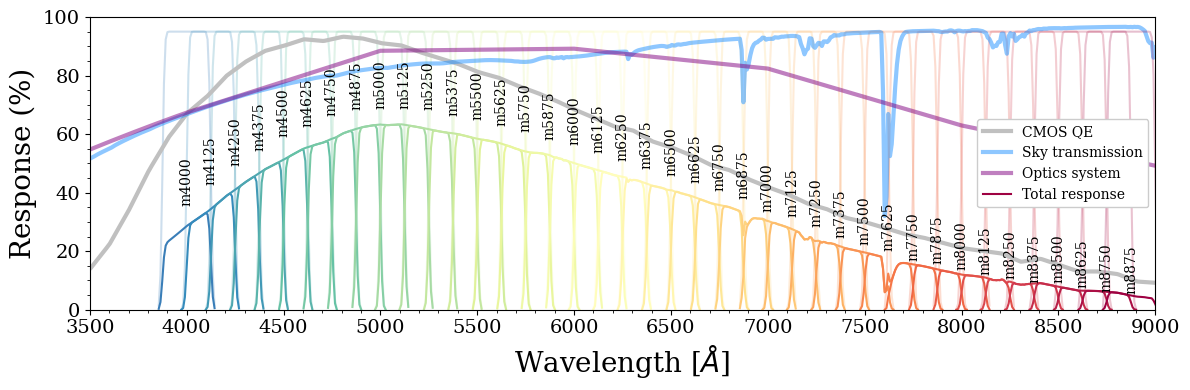

In [4]:
#	Exposure Time [s]
sdt = SevenDT()
sdt.echo_optics()
filterset = sdt.generate_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
T_qe = sdt.get_CMOS_IMX455_QE()
sdt.get_optics()
s = sdt.get_sky()
sdt.smooth_sky()
totrsptbl = sdt.calculate_response()
Npix_ptsrc, Narcsec_ptsrc = sdt.get_phot_aperture(exptime=exptime_single, fwhm_seeing=seeing, optfactor=1.0, verbose=False)
outbl_ris = sdt.get_depth_table(Nsigma=5)
sdt.get_speclite()

## Synthetic Photometry

### Feige 110 (Standard Star)

In [5]:
sptbl = Table.read('../data/Example_Spectra/fFeige110.dat', format='ascii')
sptbl[:5]

col1,col2
float64,float64
3000.05,5.89165e-13
3000.15,5.89077e-13
3000.25,5.89013e-13
3000.35,5.88959e-13
3000.45,5.88903e-13


In [6]:
lam = sptbl['col1']*u.Angstrom
flam = sptbl['col2']*flamunit

filter,lam,bandwidth,magabs,snr,magapp,magobs,magerr,fnuobs,fnuerr,fnu
,Angstrom,,,,mag(AB),mag(AB),mag(AB),uJy,uJy,uJy
str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
m4000,4010.792,250.000,11.252,845.934,11.252,11.253,0.010,114498.769,135.352,114615.839
m4125,4134.015,250.000,11.279,911.066,11.279,11.277,0.010,112005.726,122.939,111838.132
m4250,4257.559,250.000,11.335,950.292,11.335,11.334,0.010,106251.010,111.809,106136.751
m4375,4380.872,250.000,11.389,974.771,11.389,11.390,0.010,100957.608,103.571,100997.574
m4500,4504.837,250.000,11.426,992.655,11.426,11.427,0.010,97500.286,98.222,97612.463


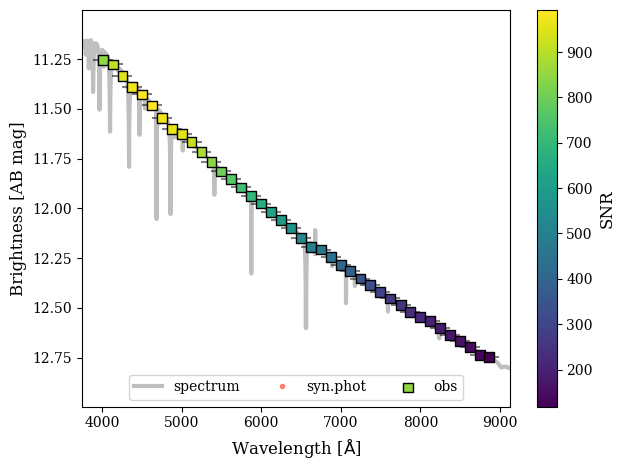

In [7]:
mobstbl = sdt.get_synphot2obs(flam, lam, z=None, z0=None, figure=True)
mobstbl[:5]

### High-z QSO Model

In [8]:
sptbl = Table.read('../data/Example_Spectra/Highz_QSO_model.dat', format='ascii')
sptbl[:3]

col0_1,col0_2
float64,float64
3701.0,0.00869814966945632
3702.0,0.008708863212672578
3703.0,0.00871958452327259


In [9]:
sptbl.rename_columns(['col0_1', 'col0_2'], ['lam', 'fnu'])
sptbl['lam'].unit = u.Angstrom
sptbl['fnu'].unit = u.uJy

In [10]:
lam = sptbl['lam']
fnu = sptbl['fnu'] #.to(u.erg / (u.second * u.cm**2 * u.Hz))

In [11]:
flam = convert_fnu2flam(fnu, lam)
sptbl['flam'] = flam

filter,lam,bandwidth,magabs,snr,magapp,magobs,magerr,fnuobs,fnuerr,fnu
,Angstrom,,,,mag(AB),mag(AB),mag(AB),uJy,uJy,uJy
str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
m4000,4010.792,250.000,28.562,0.005,28.562,27.809,5.748,0.027,5.414,0.014
m4125,4134.015,250.000,28.253,0.008,28.253,26.477,5.255,0.093,11.690,0.018
m4250,4257.559,250.000,27.920,0.012,27.920,20.203,4.779,30.127,2426.915,0.025
m4375,4380.872,250.000,27.503,0.020,27.503,34.968,4.261,0.000,0.002,0.036
m4500,4504.837,250.000,26.914,0.037,26.914,23.976,3.614,0.933,25.090,0.062


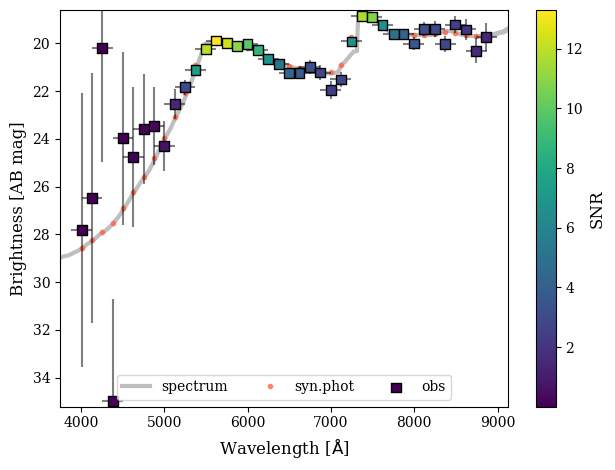

In [12]:
mobstbl = sdt.get_synphot2obs(flam, lam, z=None, z0=None, figure=True)
mobstbl[:5]